## Notebook for inspection of datasets
Check of data after script application

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions').set_index('index')

dfratclean= pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratvelocity= pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
dfratclean.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
654,654,2.725000,0.000421,0.100259,0.037312,-0.174614,-0.158260,0.660537,0
655,655,2.729167,0.002050,0.100554,0.037935,-0.158835,-0.154542,0.658703,0
656,656,2.733334,0.003672,0.100841,0.038550,-0.143174,-0.150851,0.657018,0
657,657,2.737500,0.005299,0.101125,0.039161,-0.127507,-0.147160,0.655308,0
658,658,2.741667,0.006931,0.101406,0.039767,-0.111809,-0.143439,0.653580,0


In [3]:
dfratvelocity.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,lVo,lx1,lz1,V1,V1_ori,lx1_ori,lz1_ori,theta,U
index,,,,,,,,,,,,,,,,,,,
1,655,2.729167,0.002050,0.100554,0.037935,-0.158835,-0.154542,0.658703,0,0.004167,236.28559,-0.234414,0.972137,0.002868,0.677583,-55.388703,229.701919,-0.021824,-300.078558
2,656,2.733334,0.003672,0.100841,0.038550,-0.143174,-0.150851,0.657018,0,0.004167,236.28559,-0.212918,0.977070,0.002846,0.672437,-50.309523,230.867564,-0.022055,-303.256384
3,657,2.737500,0.005299,0.101125,0.039161,-0.127507,-0.147160,0.655308,0,0.004166,236.28559,-0.190994,0.981591,0.002825,0.667598,-45.129075,231.935868,-0.022386,-307.883196
4,658,2.741667,0.006931,0.101406,0.039767,-0.111809,-0.143439,0.653580,0,0.004167,236.28559,-0.168622,0.985681,0.002806,0.663075,-39.842925,232.902171,-0.022743,-312.714658
5,659,2.745834,0.008570,0.101685,0.040368,-0.096066,-0.139570,0.651787,0,0.004167,236.28559,-0.145813,0.989312,0.002788,0.658829,-34.453478,233.760215,-0.023097,-317.578633


In [4]:
print(len(dfratclean.Time))
print(len(dfratvelocity.Time))

764579
761312


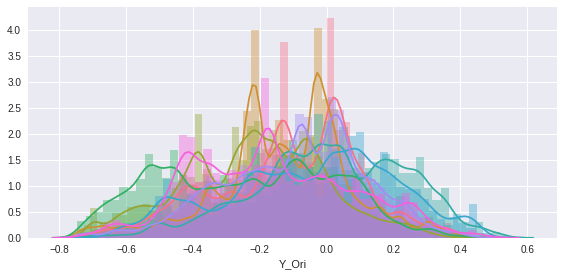

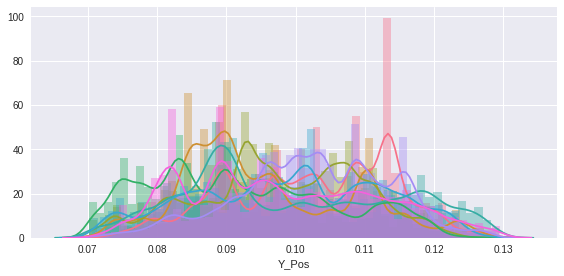

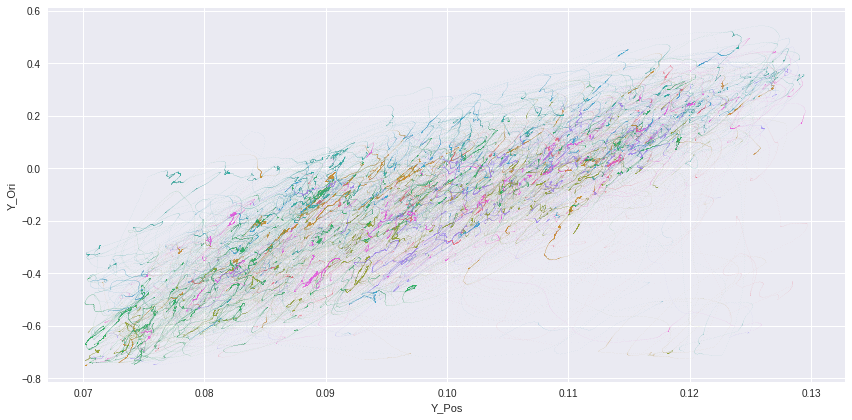

In [5]:
g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2)#,hue_order=[0,1] )
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratclean, size=4, aspect=2)#, hue_order=[0,1] )
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid( data=dfratclean, size=6, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

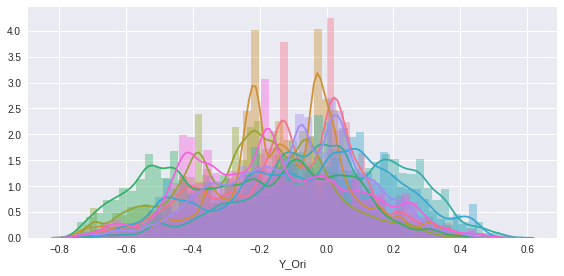

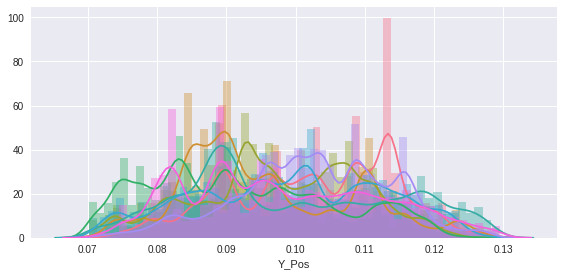

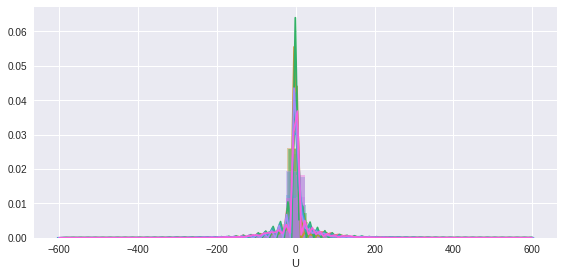

In [6]:
g = sns.FacetGrid(hue='session_id', data=dfratvelocity, size=4, aspect=2)#,hue_order=[0,1] )
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfratvelocity, size=4, aspect=2)#, hue_order=[0,1] )
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid(hue='session_id', data=dfratvelocity, size=4, aspect=2)#, hue_order=[0,1] )
g.map(sns.distplot, 'U');
